<a href="https://colab.research.google.com/github/PRAN20/NLP-Disaster/blob/main/NLP_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Header Files**

In [1]:
import pandas as ps
import matplotlib.pyplot as plt
import numpy as np

# **Importing DataBase**

In [5]:
!unzip "/content/drive/MyDrive/nlp-getting-started.zip" -d "DataSet"

Archive:  /content/drive/MyDrive/nlp-getting-started.zip
  inflating: DataSet/sample_submission.csv  
  inflating: DataSet/test.csv        
  inflating: DataSet/train.csv       


# **Initialising DataSet**

In [2]:
train = ps.read_csv("/content/DataSet/train.csv")
test = ps.read_csv("/content/DataSet/test.csv")

# **Determining DataSets**

In [3]:
train.head(15)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train.shape

(7613, 5)

In [6]:
test.shape

(3263, 4)

# **Plotting on Graph**

In [ ]:
#!pip install sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


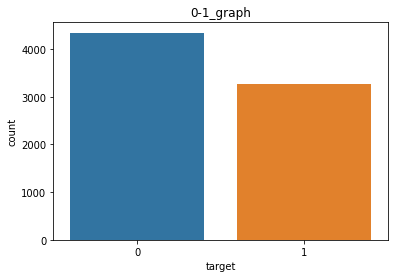

In [7]:
import seaborn as sns
fig = plt.figure()
plt.title('0-1_graph')
sns.countplot(train['target'])
fig.savefig('0-1_graph.png')

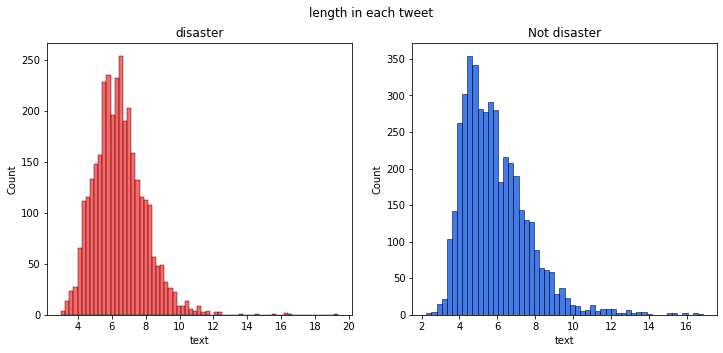

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

txt=train[train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(txt.map(lambda x: np.mean(x)),ax=ax2,color='#004de6')
ax2.set_title('Not disaster')


txt=train[train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(txt.map(lambda x: np.mean(x)),ax=ax1,color='#ff3333')
ax1.set_title('disaster')

fig.suptitle('length in each tweet')
fig.savefig('Length_of_Disaster.png')

# **Traversing to all the Tweets**

In [9]:
train1_len = train[train['target']==1]['text'].str.len().max()
train0_len = train[train['target']==0]['text'].str.len().max()

In [10]:
print("Max length of tweets of a disaster is {} and not having a disaster is {}".format(train1_len, train0_len))

Max length of tweets of a disaster is 151 and not having a disaster is 157


# **Target Analaysis**

In [11]:
avg_disaster = train[train['target']==1]['target'].count()
print(f'The average of disaster tweets:',avg_disaster/100,'%')

The average of disaster tweets: 32.71 %


In [12]:
avg_disaster = train[train['target']==0]['target'].count()
print(f'The average of disaster tweets:',avg_disaster/100,'%')

The average of disaster tweets: 43.42 %


In [13]:
train['Target_mean'] = train.groupby("keyword")['target'].mean()

In [14]:
train['Target_mean']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7608   NaN
7609   NaN
7610   NaN
7611   NaN
7612   NaN
Name: Target_mean, Length: 7613, dtype: float64

# **Plotting the Target-mean Graph**

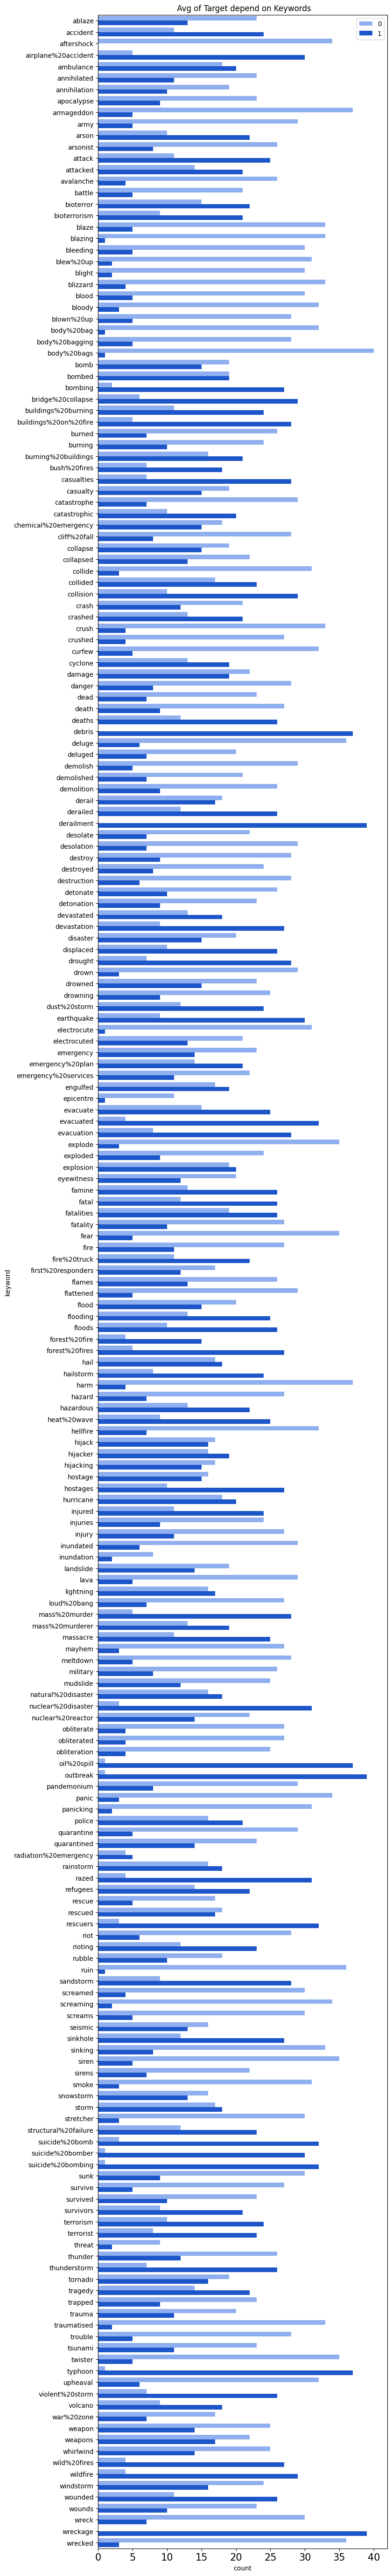

In [15]:
fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train.sort_values(by='Target_mean', ascending=True)['keyword'],
              hue=train.sort_values(by='Target_mean', ascending=True)['target'] ,  palette= ["#80aaff","#004de6"])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=10)
plt.legend(loc=1)
plt.title(' Avg of Target depend on Keywords')

plt.show()
fig.savefig('Avg of Target depend on Keywords.png')

In [16]:
train.drop(columns=['Target_mean'], inplace=True)

# **Dealing with Length Function**

In [17]:
train['Length'] = train['text'].str.len()

In [18]:
non_disaster = train[train.target == 0]
non_disaster = non_disaster.to_csv('non_disaster-Length.csv',index = False)

In [19]:
disaster = train[train.target == 1]
disaster = disaster.to_csv('Disaster-Length.csv',index = False)

In [20]:
train.drop(columns=['Length'], inplace=True)

# **Generating Heat-Map of the Variable**

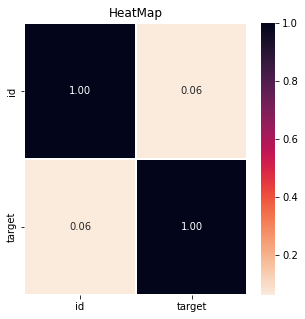

In [21]:
corr = train.corr()
f,ax = plt.subplots(figsize=(5,5))
plt.title("HeatMap")
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax ,  cmap='rocket_r')
plt.savefig("HeatMap.png")
plt.show()

# **Preparing Data**

In [22]:
print("missing values: Training set")
missing_values = train.isna().sum()
missing_values

missing values: Training set


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [23]:
print("missing values: Testing set")
missing_values = test.isna().sum()
missing_values

missing values: Testing set


id             0
keyword       26
location    1105
text           0
dtype: int64

In [24]:
for df in [train , test]:
  for e in ['keyword', 'location']:
    df[e] = df[e].fillna('No_data')

# **Cleaning the Data**

In [25]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
'''
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,1000):
  review = re.sub('[^a-zA-Z]', ' ', train['text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)
'''
def Clean(text):
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'http?:\/\/.*[\r\n]*', '', text) #remove URL
    
    text=text.replace(r'&amp;?',r'and')
    text=text.replace(r'&lt;',r'<')
    text=text.replace(r'&gt;',r'>') #remove special character 
    
    text = re.sub(r"(?:\@)\w+", '', text)
    text=text.encode("ascii",errors="ignore").decode()
    text=re.sub(r'[:"#$%&\*+,-/:;<=>@\\^_`{|}~]+','',text)
    
    text=re.sub(r'[!]+','!',text)
    text=re.sub(r'[?]+','?',text)
    text=re.sub(r'[.]+','.',text)
   
    text=re.sub(r"'","",text)
    text=re.sub(r"\(","",text)
    text=re.sub(r"\)","",text)
    
    text=" ".join(text.split())
    return text

def stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text

def lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

In [27]:
train['text']=train['text'].apply(lambda x: Clean(x))
test['text']=test['text'].apply(lambda x: Clean(x))

In [28]:
from nltk.tokenize import sent_tokenize, word_tokenize
train['text_tokens'] = train['text'].apply(lambda x: word_tokenize(x))
test['text_tokens']  = train['text'].apply(lambda x: word_tokenize(x))
train.head()

,id,keyword,location,text,target,text_tokens
0,1,No_data,No_data,Our Deeds are the Reason of this earthquake Ma...,1,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,No_data,No_data,Forest fire near La Ronge Sask Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,No_data,No_data,All residents asked to shelter in place are be...,1,"[All, residents, asked, to, shelter, in, place..."
3,6,No_data,No_data,13000 people receive wildfires evacuation orde...,1,"[13000, people, receive, wildfires, evacuation..."
4,7,No_data,No_data,Just got sent this photo from Ruby Alaska as s...,1,"[Just, got, sent, this, photo, from, Ruby, Ala..."


In [29]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
train['text_tokens']=train['text'].apply(lambda x: stemmer(x))
test['text_tokens']=test['text'].apply(lambda x: stemmer(x))

train['text_tokens']=train['text'].apply(lambda x: lemmatizer(x))
test['text_tokens']=test['text'].apply(lambda x: lemmatizer(x))

In [89]:
#print(corpus)

['deed reason earthquak may allah forgiv us', 'forest fire near la rong sask canada', 'resid ask shelter place notifi offic evacu shelter place order expect', 'peopl receiv wildfir evacu order california', 'got sent photo rubi alaska smoke wildfir pour school', 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir', 'flood disast heavi rain caus flash flood street manit colorado spring area', 'top hill see fire wood', 'emerg evacu happen build across street', 'afraid tornado come area', 'three peopl die heat wave far', 'haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood', 'rain flood florida tampabay tampa day lost count', 'flood bago myanmar arriv bago', 'damag school bu multi car crash break', 'man', 'love fruit', 'summer love', 'car fast', 'goooooooaaaaaal', 'ridicul', 'london cool', 'love ski', 'wonder day', 'looooool', 'way eat shit', 'nyc last week', 'love girlfriend', 'cooool', 'like pasta', 'end', 'bbcmtd wholesal market 

# **Creating Bag of Words**

In [51]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(max_features = 1500)
feature=train['text']
target =train['target']

# **Splitting Data into Training Set and Test Set**

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature,target,test_size = 0.2,random_state = 101)

# **Training of the Model**

In [57]:
x_train

3956    Flooding kills 166 displace over one million i...
6762    Brunette beauty Night A stretches out on a vic...
1054                    Status last seen buying body bags
7029    RTAmerica RT RTcom Eye of Super Typhoon Soudel...
5372    The good thing is that the Royals wont face a ...
                              ...                        
599     USATODAY On todays frontpage Bioterror lab fac...
5695    Young children among those rescued from capsiz...
1361    burning down buildings what you mean like when...
1547    Nueva favorita EmergeNCY feat The Chemical Bro...
4959    I had my meltdown yesterday Im going to miss y...
Name: text, Length: 6090, dtype: object

In [58]:
y_train

3956    1
6762    0
1054    0
7029    1
5372    0
       ..
599     1
5695    1
1361    1
1547    0
4959    0
Name: target, Length: 6090, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [60]:
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b' ,ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(x_train)
tfidf = TfidfTransformer(smooth_idf=True, use_idf=True)
trainfeature = tfidf.fit_transform(vectorized)

In [63]:
TFIDF= TfidfVectorizer(encoding='utf-8',
                       ngram_range=(1,1),
                       max_features=11000, 
                       norm='l2',
                       sublinear_tf=True)

In [64]:
TrainFeat_= TFIDF.fit_transform(x_train)

In [66]:
TestFeat_ = TFIDF.transform(x_test)

In [67]:
classifier = MultinomialNB()
classifier.fit(TrainFeat_,y_train)

test_pred= classifier.predict(TestFeat_)
accuracy = accuracy_score(y_train, classifier.predict(TrainFeat_))
accuracy

0.8753694581280789

In [68]:
testing_accuracy = accuracy_score(y_test, test_pred)
testing_accuracy

0.7898883782009193

In [70]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       892
           1       0.83      0.62      0.71       631

    accuracy                           0.79      1523
   macro avg       0.80      0.76      0.77      1523
weighted avg       0.80      0.79      0.78      1523



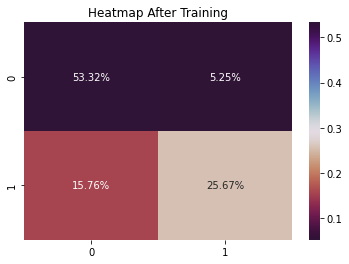

In [74]:
sns.heatmap(confusion_matrix(y_test, test_pred)/np.sum(confusion_matrix(y_test, test_pred)),annot=True, fmt='.2%', cmap='twilight_shifted_r')
plt.title("Heatmap After Training")
plt.savefig("HeatMap after Training.png")

In [76]:
tvectorizer=TFIDF.transform( train['text']).toarray()
last_predi = classifier.predict(tvectorizer)

results    = ps.DataFrame()

results['id'] = train['id']
results['target'] = last_predi

In [77]:
results

,id,target
0,1,1
1,4,1
2,5,1
3,6,1
4,7,0
...,...,...
7608,10869,1
7609,10870,1
7610,10871,1
7611,10872,1


In [78]:
result = results.to_csv('result.csv',index = False)

In [79]:
from zipfile import ZipFile
import os
  
def get_all_file_paths(directory):
  
    file_paths = []
  
    for root, directories, files in os.walk(directory):
        for filename in files:
            # join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)
  
    return file_paths        
  
def main():
    directory = '/content/Output'
    file_paths = get_all_file_paths(directory)
    print('Following files will be zipped:')
    for file_name in file_paths:
        print(file_name)
  
    with ZipFile('my_python_files.zip','w') as zip:
        for file in file_paths:
            zip.write(file)
  
    print('All files zipped successfully!')        
  
if __name__ == "__main__":
    main()

Following files will be zipped:
/content/Output/result.csv
/content/Output/Avg of Target depend on Keywords.png
/content/Output/Disaster-Length.csv
/content/Output/Length_of_Disaster.png
/content/Output/0-1_graph.png
/content/Output/HeatMap after Training.png
/content/Output/HeatMap.png
/content/Output/non_disaster-Length.csv
All files zipped successfully!
